In [13]:
import pandas as pd
from sklearn import tree
from sklearn import metrics
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.cross_validation import KFold, StratifiedKFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
import numpy as np
from __future__ import print_function

In [7]:
df_match = pd.read_csv('dataset.csv')
all_match_attributes=df_match.columns.values.tolist()
after_match_attributes =['home_team_goal', 'away_team_goal', 'possession_home', 'shoton_home', 'shoton_away', 
                      'shotoff_home', 'shotoff_away', 'corner_home', 'corner_away', 'cross_home', 'cross_away', 
                      'foulcommit_home', 'foulcommit_away', 'rcard_home', 'rcard_away', 'ycard_home', 'ycard_away', 
                      'throwin_home', 'throwin_away']
before_match_attributes = list(set(all_match_attributes) - set(after_match_attributes))
before_match_all=before_match_attributes+['possession_home']
df_before_match = df_match[before_match_all]

In [8]:
holdout_per=0.2
df_before_match_out_sample = df_before_match.sample(frac=holdout_per)
df_before_match_out_testtarget = df_before_match_out_sample['possession_home']
df_before_match_out_test =df_before_match_out_sample[before_match_attributes]

df_before_match_out_left = df_before_match.iloc[list(set(df_before_match.index.values.tolist())-set(df_before_match_out_sample.index.values.tolist()))]
df_before_match_out_training = df_before_match_out_left[before_match_attributes]
df_before_match_out_trainingtarget = df_before_match_out_left['possession_home']

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.4s finished

[2017-10-31 15:52:56] Features: 1/41 -- score: -57.2949621849[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.7s finished

[2017-10-31 15:52:57] Features: 2/41 -- score: -51.5454792819[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:    0.6s finished

[2017-10-31 15:52:57] Features: 3/41 -- score: -50.6616616289[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:    0.4s finished

[2017-10-31 15:52:58] Features: 4/41 -- score: -49.7207006924[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:    0.7s finished

[

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s finished

[2017-10-31 15:53:17] Features: 40/41 -- score: -50.6030049352[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished

[2017-10-31 15:53:17] Features: 41/41 -- score: -51.2601503282

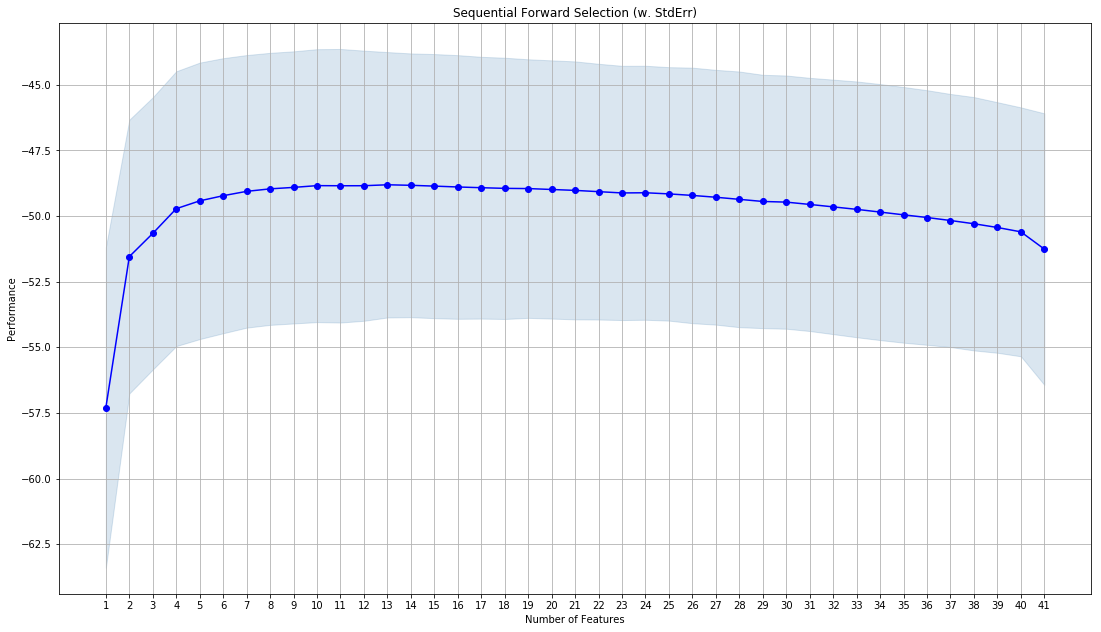

In [9]:
lr = linear_model.LinearRegression()
sfs_greedy = SFS(lr, 
           k_features=df_before_match_out_training.shape[1], 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='neg_mean_squared_error',
           cv=10)
sfs_greedy = sfs_greedy.fit(df_before_match_out_training.as_matrix(), df_before_match_out_trainingtarget.as_matrix())
fig = plot_sfs(sfs_greedy.get_metric_dict(), kind='std_err')
fig.set_size_inches(18.5, 10.5, forward=True)
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [11]:
df_features_forward_greedy = pd.DataFrame.from_dict(sfs_greedy.get_metric_dict()).T
df_features_forward_greedy

,avg_score,ci_bound,cv_scores,feature_idx,std_dev,std_err
1,-57.295,13.6089,"[-37.927275633, -32.8949206736, -43.0105628286...","(10,)",18.3232,6.10773
2,-51.5455,11.6193,"[-35.9781993275, -32.5885095607, -37.723553214...","(10, 11)",15.6444,5.21481
3,-50.6617,11.5521,"[-38.3828328228, -33.3039692265, -35.809298854...","(32, 10, 11)",15.554,5.18465
4,-49.7207,11.6622,"[-38.7746105427, -33.602786478, -33.6989601363...","(32, 10, 11, 23)",15.7022,5.23406
5,-49.4223,11.7329,"[-37.4665367988, -32.7818320036, -34.156271955...","(32, 10, 11, 17, 23)",15.7974,5.26581
6,-49.226,11.6732,"[-36.7394990532, -32.3910250983, -34.326177452...","(32, 33, 10, 11, 17, 23)",15.717,5.239
7,-49.0605,11.5681,"[-36.5041489543, -31.8320366127, -34.511701018...","(32, 33, 10, 11, 17, 23, 24)",15.5755,5.19184
8,-48.9654,11.5452,"[-35.9828443752, -31.5183125802, -34.445767242...","(32, 33, 10, 11, 17, 23, 24, 29)",15.5447,5.18155
9,-48.9096,11.5484,"[-35.7669804261, -31.5349266131, -34.440066177...","(10, 11, 16, 17, 23, 24, 29, 32, 33)",15.549,5.18299
10,-48.8425,11.5826,"[-35.4184335625, -31.4184928135, -34.786935110...","(10, 11, 16, 17, 23, 24, 29, 32, 33, 37)",15.595,5.19833


#### simple greedy solution: 


In [16]:
greedy_selected_columns_index=list()

selected_column_indice=df_features_forward_greedy[df_features_forward_greedy['avg_score'] == df_features_forward_greedy['avg_score'].max()]['feature_idx']
greedy_selected_columns_index=selected_column_indice.tolist()
greedy_selected_colname_list = df_before_match_out_training.columns[greedy_selected_columns_index].tolist()
print("Selected columns by simple greedy sequential forward selection are: \n",greedy_selected_colname_list)

Selected columns by simple greedy sequential forward selection are: 
 ['stage', 'IWH', 'B365A', 'buildUpPlaySpeed_home', 'defencePressure_home', 'LBD', 'buildUpPlayPassing_home', 'buildUpPlaySpeed_away', 'defenceTeamWidth_away', 'buildUpPlayPassing_away', 'defenceAggression_away', 'IWA', 'buildUpPlayDribbling_home']


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.4s finished

[2017-10-31 15:57:21] Features: 1/41 -- score: -57.2949621849[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished

[2017-10-31 15:57:22] Features: 2/41 -- score: -51.5454792819[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished

[2017-10-31 15:57:22] Features: 3/41 -- score: -50.6616616289[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s rem

[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.5s finished

[2017-10-31 15:57:40] Features: 19/41 -- score: -48.7579901466[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.5s finished

[2017-10-31 15:57:41] Features: 20/41 -- score: -48.8065976616[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.6s finished

[2017-10-31 15:57:43] Features: 20/41 -- score: -48.7

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:    3.0s finished

[2017-10-31 15:58:23] Features: 38/41 -- score: -50.2215712163[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:    2.3s finished

[2017-10-31 15:58:25] Features: 39/41 -- score: -50.3915131618[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:    2.4s finished

[2017-10-31 15:58:28] Features: 40/41 -- score: -50.6030049352[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s 

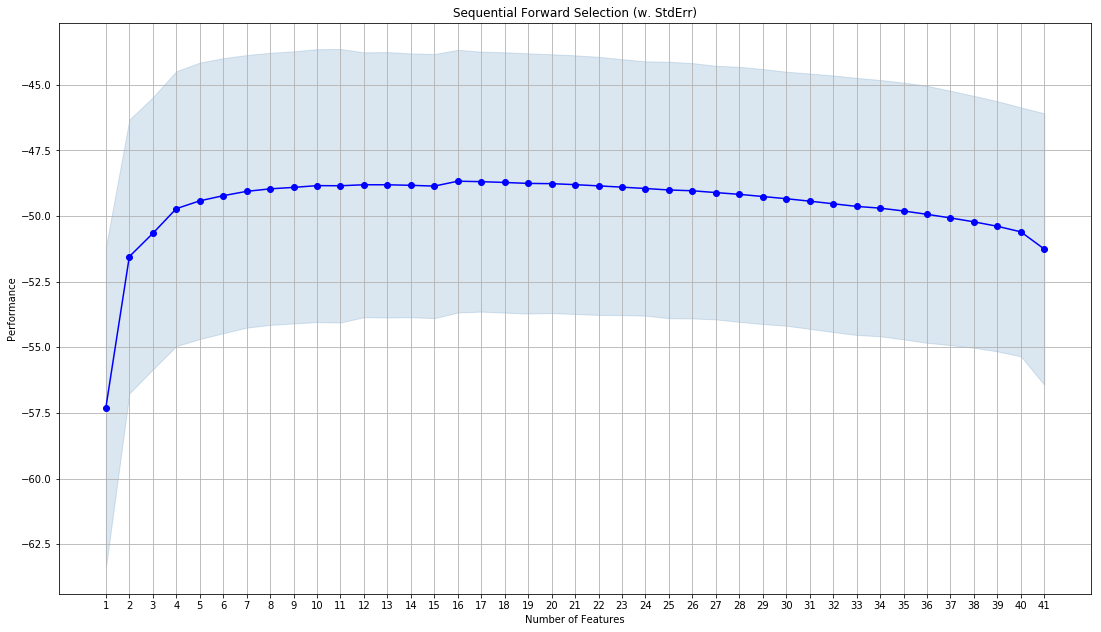

In [17]:
lr = linear_model.LinearRegression()
sfs_float = SFS(lr, 
           k_features=df_before_match_out_training.shape[1], 
           forward=True, 
           floating=True, 
           verbose=2,
           scoring='neg_mean_squared_error',
           cv=10)
sfs_float = sfs_float.fit(df_before_match_out_training.as_matrix(), df_before_match_out_trainingtarget.as_matrix())
fig = plot_sfs(sfs_float.get_metric_dict(), kind='std_err')
fig.set_size_inches(18.5, 10.5, forward=True)
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [18]:
df_features_forward_float = pd.DataFrame.from_dict(sfs_float.get_metric_dict()).T
df_features_forward_float

,avg_score,ci_bound,cv_scores,feature_idx,std_dev,std_err
1,-57.295,13.6089,"[-37.927275633, -32.8949206736, -43.0105628286...","(10,)",18.3232,6.10773
2,-51.5455,11.6193,"[-35.9781993275, -32.5885095607, -37.723553214...","(10, 11)",15.6444,5.21481
3,-50.6617,11.5521,"[-38.3828328228, -33.3039692265, -35.809298854...","(32, 10, 11)",15.554,5.18465
4,-49.7207,11.6622,"[-38.7746105427, -33.602786478, -33.6989601363...","(32, 10, 11, 23)",15.7022,5.23406
5,-49.4223,11.7329,"[-37.4665367988, -32.7818320036, -34.156271955...","(32, 10, 11, 17, 23)",15.7974,5.26581
6,-49.226,11.6732,"[-36.7394990532, -32.3910250983, -34.326177452...","(32, 33, 10, 11, 17, 23)",15.717,5.239
7,-49.0605,11.5681,"[-36.5041489543, -31.8320366127, -34.511701018...","(32, 33, 10, 11, 17, 23, 24)",15.5755,5.19184
8,-48.9654,11.5452,"[-35.9828443752, -31.5183125802, -34.445767242...","(32, 33, 10, 11, 17, 23, 24, 29)",15.5447,5.18155
9,-48.9096,11.5484,"[-35.7669804261, -31.5349266131, -34.440066177...","(10, 11, 16, 17, 23, 24, 29, 32, 33)",15.549,5.18299
10,-48.8425,11.5826,"[-35.4184335625, -31.4184928135, -34.786935110...","(10, 11, 16, 17, 23, 24, 29, 32, 33, 37)",15.595,5.19833


#### float solution: 

In [20]:
float_selected_columns_index=list()

selected_column_indice=df_features_forward_float[df_features_forward_float['avg_score'] == df_features_forward_float['avg_score'].max()]['feature_idx']
float_selected_columns_index=selected_column_indice.tolist()
float_selected_colname_list = df_before_match_out_training.columns[float_selected_columns_index].tolist()
print("Selected columns by float greedy sequential forward selection are: \n",float_selected_colname_list)

Selected columns by float greedy sequential forward selection are: 
 ['B365H', 'stage', 'B365D', 'B365A', 'buildUpPlaySpeed_home', 'defencePressure_home', 'VCD', 'LBD', 'buildUpPlayPassing_home', 'buildUpPlaySpeed_away', 'chanceCreationCrossing_away', 'defenceTeamWidth_away', 'buildUpPlayPassing_away', 'defenceAggression_away', 'IWA', 'buildUpPlayDribbling_home']


## Use the selected columns from both simple greedy and float greedy to use on the outter layer holdout validation

#### 1. Simple Greedy

In [22]:
df_before_match_greedy_training=df_before_match_out_training[greedy_selected_colname_list]
df_before_match_greedy_test=df_before_match_out_test[greedy_selected_colname_list]

lr_greedy = linear_model.LinearRegression()
lr_greedy.fit(df_before_match_greedy_training.as_matrix(), df_before_match_out_trainingtarget.as_matrix())
before_match_greedy_pred = lr_greedy.predict(df_before_match_greedy_test.as_matrix())


print(r2_score(df_before_match_out_testtarget.tolist(), before_match_greedy_pred.tolist()))


0.341929174747


In [23]:
df_before_match_float_training=df_before_match_out_training[float_selected_colname_list]
df_before_match_float_test=df_before_match_out_test[float_selected_colname_list]

lr_greedy = linear_model.LinearRegression()
lr_greedy.fit(df_before_match_float_training.as_matrix(), df_before_match_out_trainingtarget.as_matrix())
before_match_float_pred = lr_greedy.predict(df_before_match_float_test.as_matrix())


print(r2_score(df_before_match_out_testtarget.tolist(), before_match_float_pred.tolist()))

0.342529362986


## Using Support Vector Regression for Non-Linear Fit

In [ ]:
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
lr = SVR(kernel='poly')
sfs_float = SFS(lr, 
           k_features=df_before_match_out_training.shape[1], 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='neg_mean_squared_error',
           cv=10)
sfs_float = sfs_float.fit(df_before_match_out_training.as_matrix(), df_before_match_out_trainingtarget.as_matrix())
fig = plot_sfs(sfs_float.get_metric_dict(), kind='std_err')
fig.set_size_inches(18.5, 10.5, forward=True)
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()